In [101]:
#import the needed packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [102]:
# read in app_usage data into vpn_df


vpn_df= pd.read_csv("/Users/rishika/Desktop/app_usage.csv")


In [103]:
#oberve the data
#RemoteAccess is the target, will build a model that 
#takes all other columns as X to predict remote VPN usage

#look at the shape of the dataframe
print(vpn_df.shape)

#look at the column names
print(vpn_df.columns)

#show the first 5 records
print(vpn_df.head(5))


(91, 11)
Index(['CRM', 'CloudDrive', 'ERP', 'Expenses', 'HR1', 'HR2', 'ITOps', 'OTHER',
       'Recruiting', 'Webmail', 'RemoteAccess'],
      dtype='object')
   CRM  CloudDrive  ERP  Expenses  HR1  HR2  ITOps  OTHER  Recruiting  \
0   49          99   17        38    0    0     18    144          33   
1  107         148   28        54    0    0     38    188          30   
2  639         796  221       216    0    0    133   1175         297   
3  653         767  203       191    0    0    139   1475         308   
4  670         738  196       140    0    0    128   1111         305   

   Webmail  RemoteAccess  
0      141           283  
1      213           430  
2      579           732  
3      549           738  
4      678           781  


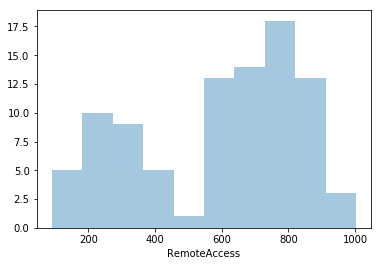

In [104]:
#Visualize data

#1. See the distribtuion of Remote VPN Access
y = vpn_df.RemoteAccess
## Create a histogram of VPN usage close to the display below
                                
sns.distplot(y, bins= 10, kde=False)


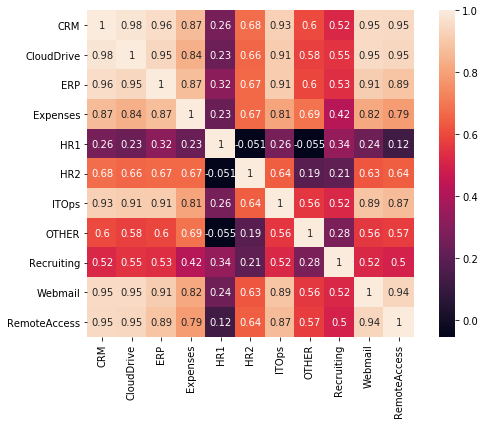

In [105]:

#2. See the correlation heat map


## Create a correlation heatmap close to the display below  ####
                              
correlation=vpn_df.corr()
f,ax= plt.subplots(figsize=(8,6))
sns.heatmap(correlation, vmax=1, square=True, annot= True)

f.tight_layout()



In [106]:
#determine that this is supervised machine learning problem
#Linear Regression can be a good model
from sklearn import linear_model

In [107]:
#The function takes X, y and retrun the trained model and R squared
def train_model(X,y):
    model = linear_model.LinearRegression()
    model.fit(X, y)
    R_2 = model.score(X,y)
    return model, R_2
#create a function to calculate Adjusted R_square
# n is the number of sample, p is the number features
def cal_adjusted_R(R_2, p, n):
    R_adjusted = R_2-(1-R_2)*(p/(n-p-1))
    return R_adjusted


In [108]:
#R_2_array stores the R squared of all the features
R2_array = np.array([])

#Calcuate the R_squared 
for col_name in vpn_df.columns:
    if col_name == 'RemoteAccess':
        continue
    else:
        x_feature=vpn_df[[col_name]]
        target= vpn_df[['RemoteAccess']]
        
        model, R_2 = train_model(x_feature,target)
        
        R2_array= np.append(R2_array, R_2)
        print(col_name, R2_array)
                
        
        
        


## sorted_R_2_index stores the index numbers of R_2_array   ####
## in descending order of the R_2 values                    ####        
sorted_R2_index = np.argsort(R2_array)[::-1]       

# #print out the sorted indexes 
print("The order of index numbers are : \t", sorted_R2_index)

CRM [0.90306039]
CloudDrive [0.90306039 0.89325677]
ERP [0.90306039 0.89325677 0.79043011]
Expenses [0.90306039 0.89325677 0.79043011 0.62326656]
HR1 [0.90306039 0.89325677 0.79043011 0.62326656 0.01530803]
HR2 [0.90306039 0.89325677 0.79043011 0.62326656 0.01530803 0.41428586]
ITOps [0.90306039 0.89325677 0.79043011 0.62326656 0.01530803 0.41428586
 0.7566205 ]
OTHER [0.90306039 0.89325677 0.79043011 0.62326656 0.01530803 0.41428586
 0.7566205  0.32687562]
Recruiting [0.90306039 0.89325677 0.79043011 0.62326656 0.01530803 0.41428586
 0.7566205  0.32687562 0.24953323]
Webmail [0.90306039 0.89325677 0.79043011 0.62326656 0.01530803 0.41428586
 0.7566205  0.32687562 0.24953323 0.88478197]
The order of index numbers are : 	 [0 1 9 2 6 3 5 7 8 4]


In [109]:
#gradually build up our model and add R squared and adjusted R to the output

for i in range(len(sorted_R2_index)): 
    selected_features =[]
    
    
    for j in range(i+1):
        selected_features.append(vpn_df.columns[sorted_R2_index[j]])
            
    
    print(selected_features)
   
    
    # X
    X_feature = vpn_df[selected_features]
    
    # y
    target = vpn_df[['RemoteAccess']]
    
    # train the model
    model, R_2 = train_model(X_feature, target)
    
    #calculate adjusted R
    R_adjusted = cal_adjusted_R(R_2, i+1, vpn_df.shape[0])
   


['CRM']
['CRM', 'CloudDrive']
['CRM', 'CloudDrive', 'Webmail']
['CRM', 'CloudDrive', 'Webmail', 'ERP']
['CRM', 'CloudDrive', 'Webmail', 'ERP', 'ITOps']
['CRM', 'CloudDrive', 'Webmail', 'ERP', 'ITOps', 'Expenses']
['CRM', 'CloudDrive', 'Webmail', 'ERP', 'ITOps', 'Expenses', 'HR2']
['CRM', 'CloudDrive', 'Webmail', 'ERP', 'ITOps', 'Expenses', 'HR2', 'OTHER']
['CRM', 'CloudDrive', 'Webmail', 'ERP', 'ITOps', 'Expenses', 'HR2', 'OTHER', 'Recruiting']
['CRM', 'CloudDrive', 'Webmail', 'ERP', 'ITOps', 'Expenses', 'HR2', 'OTHER', 'Recruiting', 'HR1']


In [110]:
#let's build the model with all the features

y = vpn_df['RemoteAccess']
X = vpn_df.drop('RemoteAccess', 1)

from sklearn import linear_model

#create a linear regression model from linear_model package 
model=linear_model.LinearRegression()

#Train the model with our data (X, y)
model.fit(X,y)

#Display the parameters
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

#use R squared to see how much variation is explained by the trained model
print('R_squared: \n', model.score(X,y))


Intercept: 
 168.7686827349812
Coefficients: 
 [ 0.78030166  0.02552479 -0.3614915  -0.22380617 -0.14305536 -0.02601244
 -0.14498212 -0.01503002  0.02986555  0.32726658]
R_squared: 
 0.9392847759700534


In [112]:
from itertools import combinations
combination = list(combinations([0,1,2,3,4,5], 3))


print((combination))


[(0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (0, 2, 3), (0, 2, 4), (0, 2, 5), (0, 3, 4), (0, 3, 5), (0, 4, 5), (1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 3, 4), (1, 3, 5), (1, 4, 5), (2, 3, 4), (2, 3, 5), (2, 4, 5), (3, 4, 5)]


In [126]:
# 1. after reading the above article, you decide to keep only one feature to represent 
# all the features that have correlation higher than 0.9 to it. 
##################################################################################
## modify the following code to remove the features you feel necessary

X = vpn_df.drop(['CloudDrive','ERP','ITOps','Webmail'],1)
#################################################################################


# 2. we use Lasso to further penalize models with more features
from sklearn.linear_model import Lasso
new_R2_array = np.array([])
# in Lasso, the score is still R squared 
best_score = 0

# Lasso has a parameter alpha used to adjust the level of penalizing the 
# number of features. A bigger alpha will produce less features. 
# We initiate the best alpha to 0 
best_alpha = 0 

# let's fine tune alpha to find the model we need 
for alpha in np.linspace(1,0.2, 1000):
    
#     #create a linear regression (Lasso) model from linear_model package 
    model=Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    best_alpha=alpha
for i in (combination): 
    new_selected_features =[]  
        
        
    for j in i:
        new_selected_features.append(X.columns[j])
          
   
        new_X_feature = X[new_selected_features]
    
        target = vpn_df[['RemoteAccess']]
    
        new_model, new_R_2 = train_model(new_X_feature, target) 
        new_R2_array= np.append(new_R2_array, new_R_2)
            
    
    
best_score= new_R2_array[2]

  
    
 
            

print("The best R of my 3-feature model is:\t\t", best_score)
print("The alpha I used in Lasso to find my model is: \t", best_alpha)

    #use R squared to see how much variation is explained by the trained model
print('R_squared: \n',  new_R2_array)

The best R of my 3-feature model is:		 0.9263012802367787
The alpha I used in Lasso to find my model is: 	 0.2
R_squared: 
 [0.90306039 0.90918173 0.92630128 0.90306039 0.90918173 0.90946414
 0.90306039 0.90918173 0.91054207 0.90306039 0.90918173 0.90918318
 0.90306039 0.92027097 0.92228838 0.90306039 0.92027097 0.92168838
 0.90306039 0.92027097 0.92173919 0.90306039 0.90306041 0.90306041
 0.90306039 0.90306041 0.90308467 0.90306039 0.9030604  0.90308374
 0.62326656 0.6269552  0.64835903 0.62326656 0.6269552  0.6273017
 0.62326656 0.6269552  0.67033233 0.62326656 0.6480747  0.6663257
 0.62326656 0.6480747  0.68887808 0.62326656 0.62458114 0.65855112
 0.01530803 0.43882052 0.65724798 0.01530803 0.43882052 0.5548913
 0.01530803 0.35094509 0.45302182 0.41428586 0.62558689 0.69736592]


In [128]:
##### Write your summary here
print("My summary:first i removed the redundant features and then i did permutation combination on the remaining features using drop function and found out their r squared and selected the one with the highest score that is .92        ")
print("the 3 features in my model are: CRM, Expenses, HR1 ")

My summary:first i removed the redundant features and then i did permutation combination on the remaining features using drop function and found out their r squared and selected the one with the highest score that is .92        
the 3 features in my model are: CRM, Expenses, HR1 
